In [8]:
import pandas as pd
births = pd.read_csv("births.csv") 
print(births.head()) 
# replacing null values with 0 in day column
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [9]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


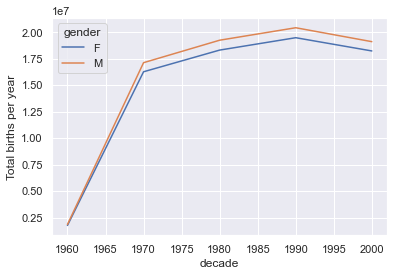

In [10]:
# lets visualize the total number of births by year
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel("Total births per year")
plt.show()


In [11]:
# lets do some data cleaning and cut off the outliers
# we’ll do this via a robust sigma-clipping operation
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [12]:
# This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. 
# With this we can use the query() method to filter out rows with births outside these values
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\Tahir\AppData\Local\Temp/ipykernel_17356/2556831438.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


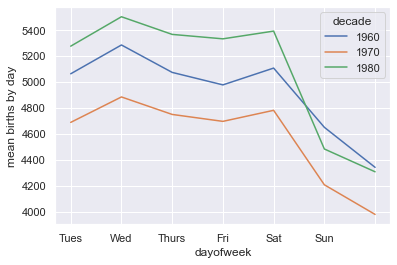

In [16]:
# Using this we can plot births by weekday for several decades
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')
plt.show()

In [14]:
# Apparently births are slightly less common on weekends than on weekdays! 
# Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989
# Lets group the data by month and day separately
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


C:\Users\Tahir\AppData\Local\Temp/ipykernel_17356/1025303898.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


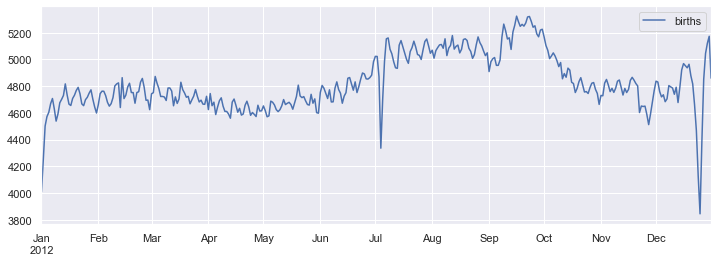

In [15]:
# Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()